In [1]:
import pandas as pd

In [2]:
test = pd.read_csv('cs-test.csv')
train = pd.read_csv('cs-training.csv')
print "Test data shape: ", test.shape
print "Training data shape: ", train.shape

Test data shape:  (101503, 12)
Training data shape:  (150000, 12)


In [3]:
display(test.head())
print '- - ' * 20
display(train.head())

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# cs_train 和 cs_test 中表头含义的说明
datatype = pd.read_excel('Data Dictionary.xls')
display(datatype)

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


## 数据类别的划分

1. 基本属性：age（年龄）
2. 财产状况：NumberOfOpenCreditLinesAndLoans（开放式贷款和信贷），NumberRealEstateLoansOrLines（不动产抵押贷款或房屋将会信贷额度）
3. 信用状况：NumberOfTimes90DaysLate（逾期>=90天），NumberOfTime60-89DaysPastDueNotWorse（逾期60-89天的次数），NumberOfTime30-59DaysPastDueNotWorse（逾期30-59天的次数）
4. 偿还能力：MonthlyIncome（月收入），DebtRatio（负债率）
5. 其他因素：NumberOfDependents（家属数量）

其中**SeriousDlqin2yrs**应该是我们需要进行预测的**y**值，其他数据属于基本变量。

In [5]:
import seaborn as sns
%matplotlib inline

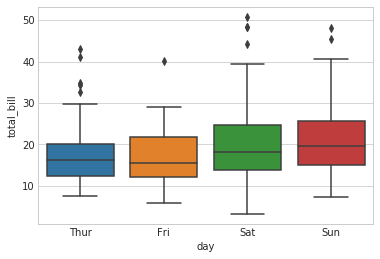

In [7]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["day"], y=tips['total_bill'])

In [8]:
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 缺失值的处理

首先观察一下Train数据集中各行中缺失值的比例

In [9]:
import numpy as np
# 去除序列号列
train = train.drop('Unnamed: 0', axis=1)

In [7]:
# 统计每列数据中NAN值的比例
for col in train.columns:
    nanCount = np.count_nonzero(np.isnan(train[col]))
    print "%s\tNAN: %s, ratio:%.2f%%" %(col, nanCount, nanCount/150000.0*100)

SeriousDlqin2yrs	NAN: 0, ratio:0.00%
RevolvingUtilizationOfUnsecuredLines	NAN: 0, ratio:0.00%
age	NAN: 0, ratio:0.00%
NumberOfTime30-59DaysPastDueNotWorse	NAN: 0, ratio:0.00%
DebtRatio	NAN: 0, ratio:0.00%
MonthlyIncome	NAN: 29731, ratio:19.82%
NumberOfOpenCreditLinesAndLoans	NAN: 0, ratio:0.00%
NumberOfTimes90DaysLate	NAN: 0, ratio:0.00%
NumberRealEstateLoansOrLines	NAN: 0, ratio:0.00%
NumberOfTime60-89DaysPastDueNotWorse	NAN: 0, ratio:0.00%
NumberOfDependents	NAN: 3924, ratio:2.62%


可以看到在**MonthlyIncome**和**NumberOfDependents**存在缺失，分别有29731和3924个，其中MonthlyIncome缺失比例比较大。缺失值的处理方法有基于聚类，基于回归，基于均值，去除等。因为这里所占的比例比较大，不能简单的去除。这里借助`fancyimpute`中的KNN方法，对缺失值进行补全。

In [8]:
from fancyimpute import KNN

# 没有必要对字符型数据进行过滤
#tmpNum = train.select_dtypes(include=[np.float])
#print tmpNum.shape, tmpNum.columns
newList = [KNN(k=5, verbose=False).complete(x) for x in np.array_split(train, 15)]


In [9]:
train_filled = np.concatenate(newList)

In [10]:
# 将缺失值实例的结果保存到文件中
#np.savetxt('train_filled.txt', train_filled, header=' '.join(train.columns.tolist()))
train_filled = np.loadtxt('train_filled.txt')

## 2. 变量分析

In [11]:
print train_filled.shape

(150000, 11)


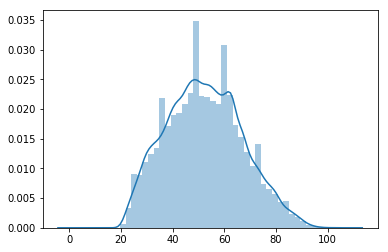

In [154]:
# 对年龄分布进行统计
sns.distplot(train_filled[:,2])

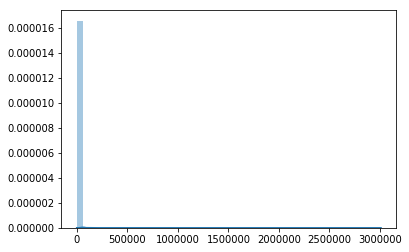

In [155]:
# 月收分布
sns.distplot(train_filled[:,5])

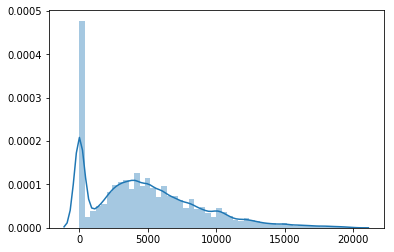

In [52]:
# 月收入在0-20000之间的分布
sns.distplot(train_filled[train_filled[:,4] < 20000,4])

异常值的处理

In [12]:
# 过滤掉年龄为0的数据 
print train.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')


In [13]:
train_filled = train_filled[train_filled[:,2] > 0,:]

In [14]:
print train_filled.shape

(149999, 11)


age


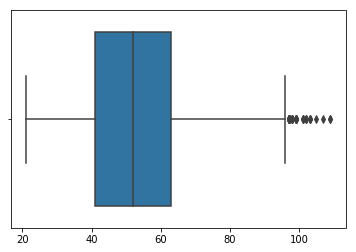

NumberOfTime30-59DaysPastDueNotWorse


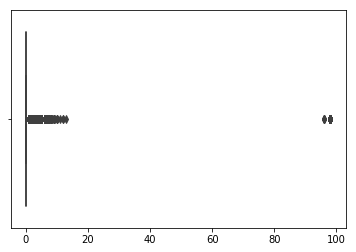

DebtRatio


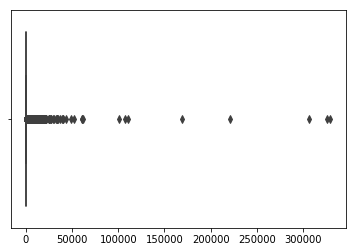

MonthlyIncome


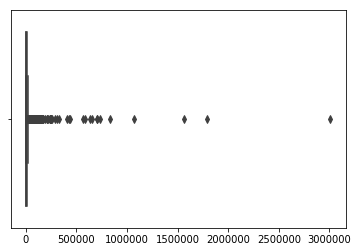

NumberOfOpenCreditLinesAndLoans


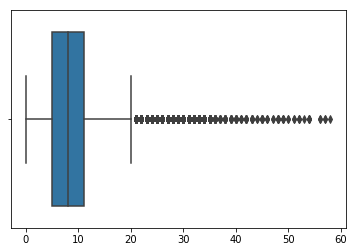

NumberOfTimes90DaysLate


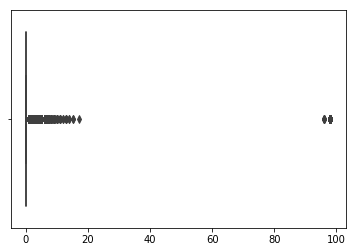

NumberRealEstateLoansOrLines


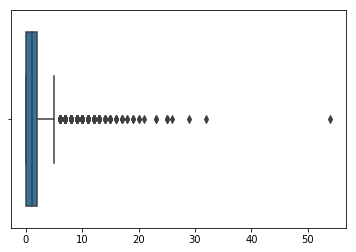

NumberOfTime60-89DaysPastDueNotWorse


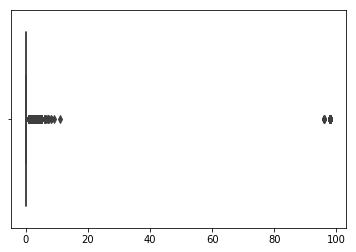

NumberOfDependents


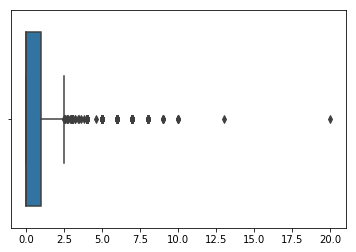

In [25]:
import matplotlib.pyplot as plt
for i, col in enumerate(train.columns):
    if i == 0 or i == 1:
        pass
    else:
        print col
        sns.boxplot(train_filled[:,i])
        plt.show()
    

NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse和NumberOfTime60-89DaysPastDueNotWorse三组数据存在很明显的异常值，可以进行过滤。其他变量中的离群值因为没有具体的业务信息，不能做出判断是不是符合异常值。

In [15]:
np.unique(train_filled[:,9])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  11.,
        96.,  98.])

In [16]:
a = train_filled[:,9]< 95
train_filled = train_filled[a, :]
print train_filled.shape

(149730, 11)


In [33]:
from scipy.stats.stats import pearsonr   
for i in range(10):
    for j in range(i+1, 10):
        c = pearsonr(train_filled[:,i], train_filled[:,j])
        print "%s X %s" % (train.columns[i+1], train.columns[j+1])
        print c

RevolvingUtilizationOfUnsecuredLines X age
(-0.0017438295666420359, 0.49982250757328073)
RevolvingUtilizationOfUnsecuredLines X NumberOfTime30-59DaysPastDueNotWorse
(-0.11297879078283807, 0.0)
RevolvingUtilizationOfUnsecuredLines X DebtRatio
(0.27455276619184316, 0.0)
RevolvingUtilizationOfUnsecuredLines X MonthlyIncome
(-0.0070694001491645115, 0.0062283132603648279)
RevolvingUtilizationOfUnsecuredLines X NumberOfOpenCreditLinesAndLoans
(-0.01325893694361035, 2.8863117319033718e-07)
RevolvingUtilizationOfUnsecuredLines X NumberOfTimes90DaysLate
(-0.024232041465668614, 6.7314043367713414e-21)
RevolvingUtilizationOfUnsecuredLines X NumberRealEstateLoansOrLines
(0.31453488826940856, 0.0)
RevolvingUtilizationOfUnsecuredLines X NumberOfTime60-89DaysPastDueNotWorse
(-0.0039571297843511112, 0.12571922109265479)
RevolvingUtilizationOfUnsecuredLines X NumberOfDependents
(0.26812973562158487, 0.0)
age X NumberOfTime30-59DaysPastDueNotWorse
(-0.0059554461032751433, 0.021196906094641241)
age X Deb

## 3. logistic线性回归

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

因为SeriousDlqin2yrs列中0和1的分布差异很大，所以在拆分数据时，应该考虑两个值的比例的平衡。

In [18]:
from sklearn.model_selection import train_test_split
X = train_filled[:,1:]
y = train_filled[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)

/home/l0o0/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
np.count_nonzero(y_train) / float(len(y_train))

0.06597709209911173

In [20]:
np.count_nonzero(y_test) / float(len(y_test))

0.06598544045949375

In [21]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
X_train.shape

(119784, 10)

In [23]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.GLM(y_train, X2)
est2 = est.fit()
print est2.summary()

/home/l0o0/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               119784
Model:                            GLM   Df Residuals:                   119773
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                 0.0513902650727
Method:                          IRLS   Log-Likelihood:                 7817.2
Date:                Thu, 09 Nov 2017   Deviance:                       6155.2
Time:                        16:11:43   Pearson chi2:                 6.16e+03
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0938      0.003     34.416      0.000       0.088       0.099
x1         -1.142e-06   2.57e-06     -0.444      0.6

In [24]:
X2 = sm.add_constant(X_train)
est = sm.GLM(y_train, X2,family = sm.families.Binomial())
est2 = est.fit()
print est2.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               119784
Model:                            GLM   Df Residuals:                   119773
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -23702.
Date:                Thu, 09 Nov 2017   Deviance:                       47403.
Time:                        16:11:57   Pearson chi2:                 3.63e+05
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8075      0.051    -35.508      0.000      -1.907      -1.708
x1         -2.039e-05   6.98e-05     -0.292      0.7

In [167]:
X2 = sm.add_constant(np.delete(X_train, np.s_[0,5],1))
est = sm.GLM(y_train, X2, family = sm.families.Binomial())
est2 = est.fit()
print est2.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               119784
Model:                            GLM   Df Residuals:                   119775
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -23628.
Date:                Thu, 09 Nov 2017   Deviance:                       47255.
Time:                        13:07:19   Pearson chi2:                 3.89e+05
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7725      0.050    -35.237      0.000      -1.871      -1.674
x1            -0.0291      0.001    -29.282      0.0

In [25]:
train_filled = np.delete(train_filled, np.s_[1,6], 1)

## 4. 模型评估

In [26]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_train, clf.decision_function(X_train))
print roc_score

0.792543428937


In [27]:
X_train2 = np.delete(X_train, np.s_[0,5],1)
clf2 = LogisticRegression()
clf2.fit(X_train2, y_train)
roc_score2 = roc_auc_score(y_train, clf2.decision_function(X_train2))
print roc_score2

0.810509527755


## 5. WOE转换

In [28]:
train.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

In [29]:
columns = np.delete(train.columns, np.s_[1,6])

In [30]:
# 对Array数据按照边界进行划分，生成一个array的dict, key为对应的划分区间

def cut(x, step):
    '''
    -x : a numpy array
    -step : a border list
    '''
    out = {}
    for i, j in enumerate(step):
        if i == 0:
            k = '-inf,%s' % j
            tmp = np.logical_and(x>=0, x<j)
        else:
            k = '%s,%s' % (step[i-1],j)
            tmp = np.logical_and(x>=step[i-1], x<step[i])
        out[k] = x[tmp]
    out['%s,inf' % j] = x[x>=step[-1]]
    return out

In [34]:
from matplotlib.pylab import plt
def barplot(i, region):
    i = i + 1
    data = train_filled[:,i]
    col = columns[i]
    state = cut(data, region)
    print col
    df = pd.DataFrame([(k, len(state[k])) for k in sorted(state.keys(), key=lambda x:float(x.split(',')[1]))], columns=['Range', "Number"])
    p = sns.barplot(x='Range', y='Number', data=df)
    p.set_xticklabels(p.get_xticklabels(), rotation=30)
    plt.show(p)
    return state

In [32]:
print train_filled.shape
print columns

(149730, 9)
Index([u'SeriousDlqin2yrs', u'age', u'NumberOfTime30-59DaysPastDueNotWorse',
       u'DebtRatio', u'MonthlyIncome', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')


age


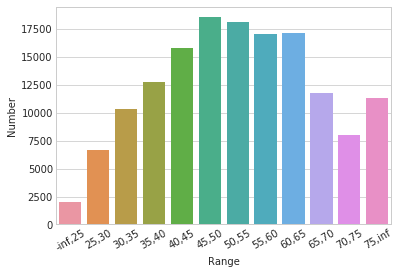

In [35]:
# for age 
x1 = barplot(0, range(25,80,5))


NumberOfTime30-59DaysPastDueNotWorse


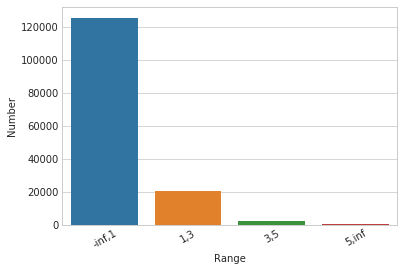

In [36]:
# for NumberOfTime30-59DaysPastDueNotWorse
x2 = barplot(1, range(1,7,2))

DebtRatio


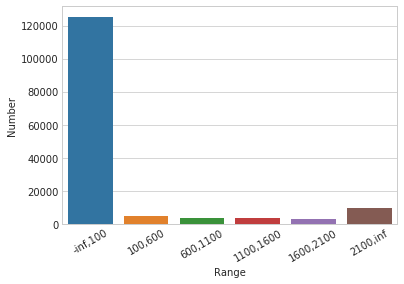

In [37]:
# for DebtRatio
x3 = barplot(2, range(100, 2400, 500))

MonthlyIncome


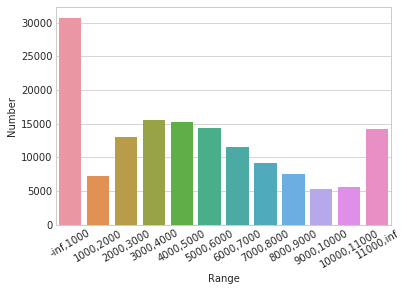

In [38]:
# for MonthlyIncome
x4 = barplot(3, range(1000, 12000, 1000))

NumberOfTimes90DaysLate


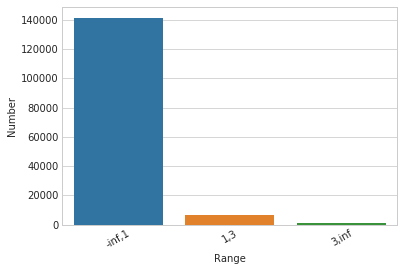

In [39]:
# for NumberOfTimes90DaysLate
x5 = barplot(4, range(1,5,2))

NumberRealEstateLoansOrLines


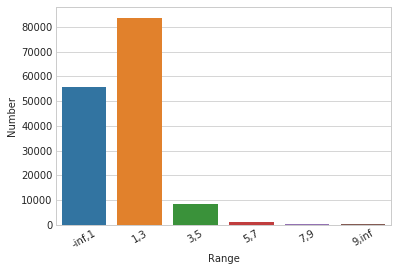

In [40]:
# for NumberRealEstateLoansOrLines
x6 = barplot(5, range(1,10,2))

NumberOfTime60-89DaysPastDueNotWorse


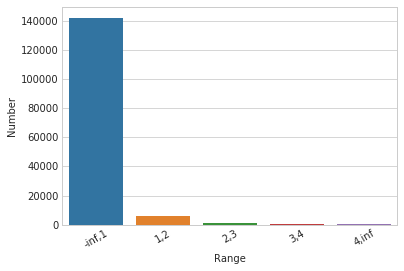

In [41]:
# for NumberOfTime60-89DaysPastDueNotWorse
x7 = barplot(6, range(1,5,1))

NumberOfDependents


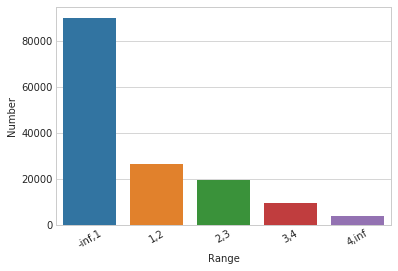

In [42]:
# NumberOfDependents
x8 = barplot(7, range(1,5))

**计算WOE值**

In [43]:
from math import log
def getWOE(i, x):
    '''
    totalgood, counts of 0 in column SeriousDlqin2yrs,
    totalbad, counts of 1 in clumn SeriousDlqin2yrs
    -i : column index
    -x : result of cut function
    '''
    col = columns[i]
    out = {}
    for k in x:
        start, end = [float(x) for x in k.split(',')]
        region = train_filled[np.logical_and(train_filled[:,i]>=start, train_filled[:,i]<=end),0]
        bad = np.count_nonzero(region)
        good = len(region) - bad
        woe = log((float(bad)/totalbad)/(float(good)/totalgood))
        out["%s:%s" % (col, k)] = woe
    return out
    
    

In [44]:
totalbad = np.count_nonzero(train_filled[:,0])
totalgood = train_filled.shape[0] - totalbad
print totalgood, totalbad

139851 9879


In [45]:
x1_woe = getWOE(1, x1)
x2_woe = getWOE(2, x2)
x3_woe = getWOE(3, x3)
x4_woe = getWOE(4, x4)
x5_woe = getWOE(5, x5)
x6_woe = getWOE(6, x6)
x7_woe = getWOE(7, x7)
x8_woe = getWOE(8, x8)

In [46]:
train_woe = train_filled
for i in range(1,9):
    tmp = eval('x%s_woe'%i)
    for j in tmp.keys():
        start, end = [float(x) for x in j.split(':')[1].split(',')]
        print j,start, end
        region = np.logical_and(train_filled[:,i]>=start, train_filled[:,i]<=end)
        train_woe[region, i] = tmp[j]

age:25,30 25.0 30.0
age:60,65 60.0 65.0
age:50,55 50.0 55.0
age:35,40 35.0 40.0
age:70,75 70.0 75.0
age:75,inf 75.0 inf
age:-inf,25 -inf 25.0
age:30,35 30.0 35.0
age:65,70 65.0 70.0
age:40,45 40.0 45.0
age:45,50 45.0 50.0
age:55,60 55.0 60.0
NumberOfTime30-59DaysPastDueNotWorse:3,5 3.0 5.0
NumberOfTime30-59DaysPastDueNotWorse:-inf,1 -inf 1.0
NumberOfTime30-59DaysPastDueNotWorse:5,inf 5.0 inf
NumberOfTime30-59DaysPastDueNotWorse:1,3 1.0 3.0
DebtRatio:100,600 100.0 600.0
DebtRatio:1100,1600 1100.0 1600.0
DebtRatio:-inf,100 -inf 100.0
DebtRatio:600,1100 600.0 1100.0
DebtRatio:1600,2100 1600.0 2100.0
DebtRatio:2100,inf 2100.0 inf
MonthlyIncome:7000,8000 7000.0 8000.0
MonthlyIncome:-inf,1000 -inf 1000.0
MonthlyIncome:2000,3000 2000.0 3000.0
MonthlyIncome:9000,10000 9000.0 10000.0
MonthlyIncome:5000,6000 5000.0 6000.0
MonthlyIncome:3000,4000 3000.0 4000.0
MonthlyIncome:6000,7000 6000.0 7000.0
MonthlyIncome:8000,9000 8000.0 9000.0
MonthlyIncome:11000,inf 11000.0 inf
MonthlyIncome:1000,2000 10

In [47]:
x1_woe

{'age:-inf,25': 0.4825374176555449,
 'age:25,30': 0.60335805708633,
 'age:30,35': 0.5137225066688411,
 'age:35,40': 0.37335137941437163,
 'age:40,45': 0.2687938044562604,
 'age:45,50': 0.20723450436301646,
 'age:50,55': 0.0843686806638802,
 'age:55,60': -0.23404811164589195,
 'age:60,65': -0.5100126169029346,
 'age:65,70': -0.895511112697344,
 'age:70,75': -0.9661867319671943,
 'age:75,inf': -1.238875369026396}

In [48]:
# 最终得到的woe矩阵
train_woe = train_woe[:,1:]
print train_woe.shape

(149730, 8)


In [49]:
train_woe[:10,:]

array([[ 0.2687938 ,  1.19813446,  0.02577656, -0.29939813, -0.16277552,
         0.81216742, -0.08409196, -0.0919479 ],
       [ 0.48253742, -0.24392711,  0.02577656,  0.36904628, -0.16277552,
         0.01937305, -0.08409196, -0.0919479 ],
       [ 0.48253742, -0.24392711,  0.02577656,  0.2894482 ,  2.21109586,
         0.01937305, -0.08409196, -0.0919479 ],
       [ 0.48253742, -0.24392711,  0.02577656,  0.2894482 , -0.16277552,
         0.01937305, -0.08409196, -0.0919479 ],
       [ 0.2072345 , -0.24392711,  0.02577656, -0.42514388, -0.16277552,
         0.01937305, -0.08409196, -0.0919479 ],
       [ 0.48253742, -0.24392711,  0.02577656,  0.2894482 , -0.16277552,
         0.01937305, -0.08409196, -0.0919479 ],
       [-0.23404811, -0.24392711, -0.25134484, -0.18781807, -0.16277552,
        -0.19876413, -0.08409196, -0.0919479 ],
       [ 0.48253742, -0.24392711,  0.02577656,  0.2894482 , -0.16277552,
         0.01937305, -0.08409196, -0.0919479 ],
       [ 0.48253742, -0.24392711

In [62]:
# y 中1表示违约，0表示没有违约，如果按照这样的表示，线性模型预测的就是违约的概率，就是此时p表示违约的概率
# 如果用1表示未违约，0表示违约，那p表示是的未违约的概率，log(odd) = log(p/(1-p))，也就是好坏比
X = train_woe
y = train_filled[:,0]
clf3 = LogisticRegression(random_state=1)
clf3.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
print clf3.coef_, clf3.intercept_
coes = clf3.coef_[0]

[[ 0.37889412  0.94352789  0.32537145  0.66156377  0.79807924  0.68857876
   0.62541461  0.71954035]] [-2.85453967]


In [59]:
p = 20/log(2)
q = 600-20*log(15)/log(2)

In [53]:
a = np.array([0,1,1,0,0,1])

In [63]:
base = q + p * clf3.intercept_[0]
print base

439.497583597


In [82]:
def getScore(p, coe, woe):
    out = []
    for k in woe.keys():
        score = p * coe * woe[k]
        out.append((k, score))
    return np.array(out, dtype=[('group','S60'), ('score', 'f4')])

对每个变量的woe值进行统计，分别计算出每个分段对应的得分

In [83]:
for i in range(1,9):
    print "x%s_woe" % i
    woe = eval("x%s_woe" % i)
    print getScore(p, coes[i-1], woe)

x1_woe
[('age:25,30',   6.59625626) ('age:60,65',  -5.57575035)
 ('age:50,55',   0.9223668 ) ('age:35,40',   4.08169127)
 ('age:70,75', -10.56290722) ('age:75,inf', -13.54409599)
 ('age:-inf,25',   5.27537584) ('age:30,35',   5.61630917)
 ('age:65,70',  -9.79024124) ('age:40,45',   2.93860793)
 ('age:45,50',   2.2656064 ) ('age:55,60',  -2.55874825)]
x2_woe
[('NumberOfTime30-59DaysPastDueNotWorse:3,5',  59.21361923)
 ('NumberOfTime30-59DaysPastDueNotWorse:-inf,1',  -6.64078379)
 ('NumberOfTime30-59DaysPastDueNotWorse:5,inf',  69.0533905 )
 ('NumberOfTime30-59DaysPastDueNotWorse:1,3',  32.61856461)]
x3_woe
[('DebtRatio:100,600',  2.31559944) ('DebtRatio:1100,1600', -3.64829087)
 ('DebtRatio:-inf,100',  0.24199645) ('DebtRatio:600,1100', -0.40612549)
 ('DebtRatio:1600,2100', -3.8532784 ) ('DebtRatio:2100,inf', -2.35968447)]
x4_woe
[('MonthlyIncome:7000,8000', -3.50000763)
 ('MonthlyIncome:-inf,1000', -3.58520174)
 ('MonthlyIncome:2000,3000',  7.04461193)
 ('MonthlyIncome:9000,10000', -5.

In [87]:
pd.DataFrame(getScore(p, coes[0], x1_woe)).T

,0,1,2,3,4,5,6,7,8,9,10,11
group,"age:25,30","age:60,65","age:50,55","age:35,40","age:70,75","age:75,inf","age:-inf,25","age:30,35","age:65,70","age:40,45","age:45,50","age:55,60"
score,6.59626,-5.57575,0.922367,4.08169,-10.5629,-13.5441,5.27538,5.61631,-9.79024,2.93861,2.26561,-2.55875


In [68]:
x['baz']

array(['Hello', 'World'],
      dtype='|S10')